<a href="https://colab.research.google.com/github/chandrak96/project/blob/master/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

#importing pandas as pd and reading the csv
data = pd.read_csv('vehicles.csv')

In [175]:
data.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
dtype: object

In [5]:
#Giving column names
data.columns = ['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders'
, 'fuel', 'odometer', 'title_status', 'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'image_url',
'description', 'county', 'state', 'lat', 'long']

#Dropping columns that are not used for predicting price
data.drop(columns=['id', 'url', 'region','region_url', 'vin', 'drive', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long'], axis = 1, inplace= True) 

In [6]:
#Dropping rows that has atleast one null value
data.dropna(axis=0, inplace = True)

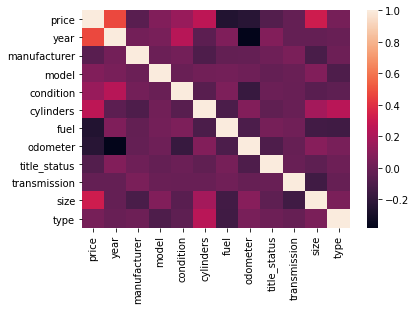

In [185]:
#Plotting correlation for price
import seaborn as sb
sb.heatmap(data.corr(method = 'pearson'), annot = False)

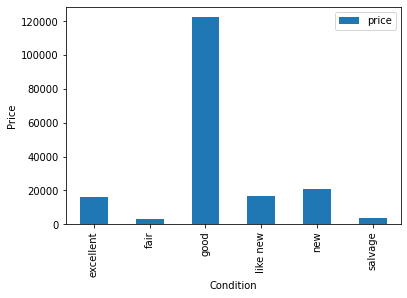

In [179]:
#plotting graphs between price and condition
import matplotlib.pyplot as plt

data.groupby("condition")['price'].mean().plot(kind='bar')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.legend()
plt.show()

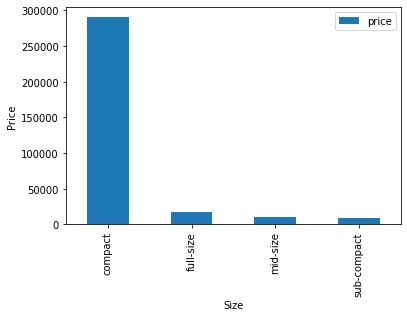

In [69]:
#plotting graph between price and size
data.groupby("size")['price'].mean().plot(kind='bar')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()

plt.show()

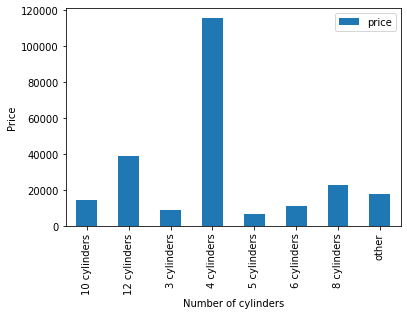

In [94]:
#plotting graph between cylinders and price
data.groupby("cylinders")['price'].mean().plot(kind='bar')
plt.xlabel('Number of cylinders')
plt.ylabel('Price')
plt.legend()

plt.show()

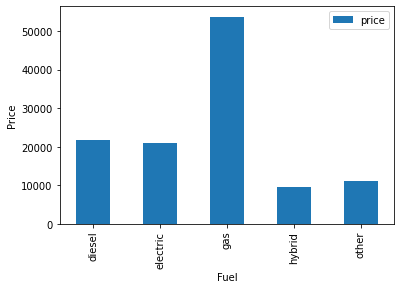

In [71]:
#plotting bar graph between price and fuel
data.groupby("fuel")['price'].mean().plot(kind='bar')
plt.xlabel('Fuel')
plt.ylabel('Price')
plt.legend()

plt.show()

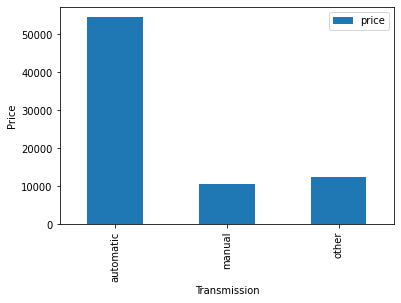

In [72]:
#plotting graph between transmission and price
data.groupby("transmission")['price'].mean().plot(kind='bar')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.legend()

plt.show()

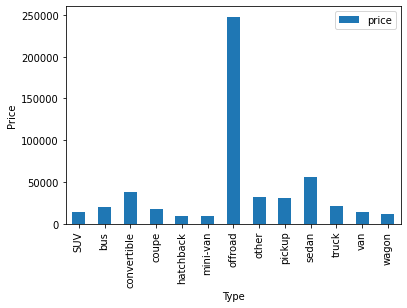

In [88]:
data.groupby("type")['price'].mean().plot(kind='bar')
#fig, ax = plt.subplots()

#data.groupby("type").plot(x = 'price', y = 'year', ax = ax, legend = False)
plt.xlabel('Type')
plt.ylabel('Price')
plt.legend()

plt.show()

In [7]:
#Converting cylinders, size and condition attributes to numeric attributs without using encoding
cleanup_nums = {"cylinders": {"4 cylinders": 4, "6 cylinders": 2, "8 cylinders": 8, "5 cylinders": 5, "10 cylinders": 10, "3 cylinders": 3, 
                                  "12 cylinders": 12, "other": 0},
                "size" : {"full-size": 4, "mid-size": 3, "compact": 2, "sub-compact": 1},
                "condition": {"new": 6, "like new": 5, "excellent": 4, "good": 3, "fair": 2, "salvage": 1}}

data = data.replace(cleanup_nums)
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,size,type
4,16995,2007.0,gmc,sierra classic 2500hd,3,8,diesel,254217.0,clean,automatic,4,truck
5,13995,2012.0,ford,f-150,3,2,gas,188406.0,clean,automatic,4,truck
6,7995,2010.0,chevrolet,equinox,3,4,gas,108124.0,clean,automatic,4,SUV
7,8995,2011.0,chevrolet,traverse,3,2,gas,178054.0,clean,automatic,4,SUV
8,10995,2014.0,ford,explorer,3,2,gas,170259.0,clean,automatic,4,SUV


In [9]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 293kB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [12]:
#Generating report using sweetviz
import sweetviz
report = sweetviz.analyze(data, target_feat = 'price')
report.show_html('report.html')


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66192 entries, 4 to 423853
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         66192 non-null  int64  
 1   year          66192 non-null  float64
 2   manufacturer  66192 non-null  int64  
 3   model         66192 non-null  int64  
 4   condition     66192 non-null  int64  
 5   cylinders     66192 non-null  int64  
 6   fuel          66192 non-null  int64  
 7   odometer      66192 non-null  float64
 8   title_status  66192 non-null  int64  
 9   transmission  66192 non-null  int64  
 10  size          66192 non-null  int64  
 11  type          66192 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.6 MB


In [10]:
#Using encoding to convert remaining non-numeric attributes to numeric attributes
from sklearn.preprocessing import LabelEncoder

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = data.columns.values.tolist()

for col in features:
  if data[col].dtype in numerics: 
    continue
  categorical_columns.append(col)

for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))  

In [13]:
#Changing year, price and odometer values 
data['year'] = (data['year']-1900).astype(int)
data['odometer'] = data['odometer'].astype(int)

data = data[data['price'] > 1000]
data = data[data['price'] < 40000]
# Rounded ['odometer'] to 5000
data['odometer'] = data['odometer'] // 5000
data['price'] = data['price']/1000

data = data[data['year'] > 110]

In [14]:
#finding attribute with highest correlations
data.corr()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,size,type
price,1.000000,0.474715,-0.059731,0.071309,0.146450,0.265793,-0.253859,-0.233647,-0.080655,-0.024236,0.314771,0.037480
year,0.474715,1.000000,0.025310,0.042000,0.242323,-0.046813,0.061689,-0.381282,0.075870,-0.024216,-0.022411,-0.014043
manufacturer,-0.059731,0.025310,1.000000,0.001561,0.028526,-0.097347,-0.029602,-0.022281,0.009215,0.049828,-0.114405,0.003691
model,0.071309,0.042000,0.001561,1.000000,-0.008322,0.018628,0.025392,0.007567,-0.019939,-0.004129,0.069136,-0.099098
condition,0.146450,0.242323,0.028526,-0.008322,1.000000,-0.066401,0.060580,-0.180960,-0.001497,-0.009745,-0.059349,-0.045775
cylinders,0.265793,-0.046813,-0.097347,0.018628,-0.066401,1.000000,-0.111154,0.072861,-0.040307,-0.009286,0.184464,0.244805
fuel,-0.253859,0.061689,-0.029602,0.025392,0.060580,-0.111154,1.000000,-0.104887,0.035669,0.013578,-0.141946,-0.144785
odometer,-0.233647,-0.381282,-0.022281,0.007567,-0.180960,0.072861,-0.104887,1.000000,-0.097447,-0.014637,0.093442,0.041948
title_status,-0.080655,0.075870,0.009215,-0.019939,-0.001497,-0.040307,0.035669,-0.097447,1.000000,-0.009743,-0.042133,0.004757
transmission,-0.024236,-0.024216,0.049828,-0.004129,-0.009745,-0.009286,0.013578,-0.014637,-0.009743,1.000000,-0.146444,-0.016951


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27733 entries, 5 to 423849
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         27733 non-null  float64
 1   year          27733 non-null  int64  
 2   manufacturer  27733 non-null  int64  
 3   model         27733 non-null  int64  
 4   condition     27733 non-null  int64  
 5   cylinders     27733 non-null  int64  
 6   fuel          27733 non-null  int64  
 7   odometer      27733 non-null  int64  
 8   title_status  27733 non-null  int64  
 9   transmission  27733 non-null  int64  
 10  size          27733 non-null  int64  
 11  type          27733 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.8 MB


In [150]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,size,type
5,13.995,112,13,3433,3,2,2,37,0,0,4,10
7,8.995,111,7,8023,3,2,2,35,0,0,4,0
8,10.995,114,13,3308,3,2,2,34,0,0,4,0
10,10.995,111,7,7028,3,8,2,42,0,0,4,10
11,12.450,111,7,7028,3,8,2,30,0,0,4,10


In [15]:
#Splitting data into test and training
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

X = data[["year", "manufacturer", "model", "condition", "cylinders", "fuel", "odometer", "title_status", "transmission", "size", "type"]]

Y = data[["price"]]

#X = np.asarray(X).astype(np.float32)
#Y = np.asarray(Y).astype(np.float32)

#Standardize the dataset using standard scaling
from sklearn.preprocessing import StandardScaler
#X1 = StandardScaler().fit_transform(X)
#Y1 = StandardScaler().fit_transform(Y.reshape(len(Y),1))[:,0]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 100)


In [16]:
#Using linear regression algorithm with 500 splits
from sklearn import model_selection

model = linear_model.LinearRegression()
kfold = model_selection.KFold(n_splits=500, random_state=7, shuffle= True)
cross_better = model_selection.cross_val_score(model , X , Y , cv=kfold)

model.fit(x_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: [-174.59428325]
Coefficient: [[ 1.61601795e+00 -2.34537257e-02  1.08550505e-04  7.29360557e-01
   9.14001535e-01 -4.37947331e+00 -6.74401452e-02 -7.73728089e-01
   9.05271203e-01  2.83868053e+00 -9.72401299e-02]]


In [18]:
#Calculating r2 score, mse and mae for evaluation
y_pred = model.predict(x_test)

score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("R2-score:", score)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

R2-score: 0.4694684842023097
Mean Absolute Error: 4.806040798778137
Mean Squared Error: 38.4145586516845


In [19]:
#Using random forest algorithm
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(x_train, y_train)
y_pred2 = regressor.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [20]:
#Calculating r2 score, mae and mse for evaluation
print('R2-score:', metrics.r2_score(y_test, y_pred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))


R2-score: 0.856410917375111
Mean Absolute Error: 1.8913014683816134
Mean Squared Error: 10.396953002767084


In [53]:
#Using keras tuner to find the best fit of optimizers
from keras.regularizers import l2
import tensorflow as tf
from tensorflow import keras
import IPython
!pip install -q -U keras-tuner

import kerastuner as kt
print('IPython version:', IPython.__version__, 'Keras Tuner version:', kt.__version__)

#model2 = keras.models.Sequential([
#keras.layers.Flatten(input_shape = [11,]),
#keras.layers.Dense(25 , kernel_initializer="he_normal", kernel_regularizer=l2(0.02), bias_regularizer=l2(0.01)),
#keras.layers.LeakyReLU(alpha = 0.2),
#keras.layers.Dense(60 , activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
#keras.layers.Dense(75 , kernel_initializer="he_normal", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
#keras.layers.LeakyReLU(alpha = 0.2),
#keras.layers.Dense(50 ,activation="linear", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))
#])


IPython version: 5.5.0 Keras Tuner version: 1.0.2


In [54]:
#Splitting data into 80 train, 10 test and 10 valid
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.2, random_state = 100)
x_valid, x_test1, y_valid, y_test1 = train_test_split(x_test1, y_test1, test_size = 0.5, random_state = 110)

In [ ]:
x_train1.size
x_valid.size
x_test1.size

30514

In [117]:
#building DNN model
def model_builder(hp):
  model2 = keras.models.Sequential()
  model2.add(keras.layers.Flatten(input_shape=[11]))
  
# Tune the number of units in the two hidden layers:
  hp_units_1 = hp.Int('units_1', min_value = 8, max_value = 512, step = 32)
  model2.add(keras.layers.Dense(units = hp_units_1, activation="relu", kernel_initializer="normal"))
  model2.add(keras.layers.BatchNormalization())
  hp_units_2 = hp.Int('units_2', min_value = 8, max_value = 512, step = 32)
  model2.add(keras.layers.Dense(units = hp_units_2, activation="relu", kernel_initializer="normal"))
#  model.add(keras.layers.Dense(50 , kernel_initializer="normal"))
#  model.add(keras.layers.LeakyReLU(alpha = 0.2))
  model2.add(keras.layers.Dense(50 , kernel_initializer="normal"))
  model2.add(keras.layers.LeakyReLU(alpha = 0.2))
  model2.add(keras.layers.Dense(75, activation="selu", kernel_initializer="normal"))
  model2.add(keras.layers.Dense(50, activation="selu", kernel_initializer="normal"))
# Tune the optimizer:
#  hp = HyperParameters()

  hp_optimizer = hp.Choice('optimizer', ['Adam', 'RMSProp', 'SGD', 'Adagrad', 'Adamax'])
  from keras.optimizers import Adam
#  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

#  opt = Adam(lr=0.9)

  model2.compile(optimizer = hp_optimizer, 
                loss = "mean_absolute_error", 
                metrics = ['mae','mse'])
  return model2


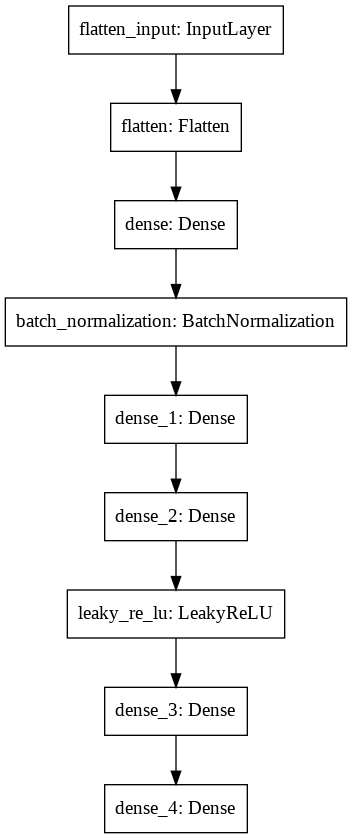

In [109]:
#f) plotting model using keras util plot
from keras.utils import plot_model
plot_model(model_e, to_file='fd.png', show_shapes= False, show_layer_names= True, expand_nested= True, rankdir='TB', dpi= 96)

In [118]:
#Clearing output for every train
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [119]:
#Specifying metrics and objective
tuner = kt.Hyperband(model_builder,
                     objective = 'mae', 
                     max_epochs = 10,
                     factor = 5,
                     overwrite = True)

In [120]:
#Running the tuner to search for best possible fit
tuner.search(x_train1, y_train1, epochs = 100, validation_data=(x_valid, y_valid), callbacks = [ClearTrainingOutput()])

Trial 13 Complete [00h 00m 19s]
mae: 4.118129253387451

Best mae So Far: 4.054052829742432
Total elapsed time: 00h 02m 24s
INFO:tensorflow:Oracle triggered exit


In [121]:
#Getting the best fit 
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'Adam',
 'tuner/bracket': 0,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/round': 0,
 'units_1': 456,
 'units_2': 296}

In [122]:
#Passing the best fit variables and fitting
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
model_e = tuner.hypermodel.build(best_hps)
history_e = model_e.fit(x_train1, y_train1, epochs = 150, validation_data = (x_valid, y_valid), verbose=1)

Epoch 1/150
694/694 [==============================] - 3s 5ms/step - loss: 5.9420 - mae: 5.9420 - mse: 64.3671 - val_loss: 5.8690 - val_mae: 5.8690 - val_mse: 63.9505
Epoch 2/150
694/694 [==============================] - 3s 5ms/step - loss: 4.9650 - mae: 4.9650 - mse: 44.7539 - val_loss: 9.0550 - val_mae: 9.0550 - val_mse: 103.2059
Epoch 3/150
694/694 [==============================] - 3s 5ms/step - loss: 4.7746 - mae: 4.7746 - mse: 41.3590 - val_loss: 6.8982 - val_mae: 6.8982 - val_mse: 91.3338
Epoch 4/150
694/694 [==============================] - 3s 5ms/step - loss: 4.7760 - mae: 4.7760 - mse: 41.2976 - val_loss: 7.2021 - val_mae: 7.2021 - val_mse: 78.7660
Epoch 5/150
694/694 [==============================] - 3s 5ms/step - loss: 4.6591 - mae: 4.6591 - mse: 39.6988 - val_loss: 4.7775 - val_mae: 4.7775 - val_mse: 41.0426
Epoch 6/150
694/694 [==============================] - 4s 6ms/step - loss: 4.5223 - mae: 4.5223 - mse: 37.9729 - val_loss: 5.4938 - val_mae: 5.4938 - val_mse: 47.88

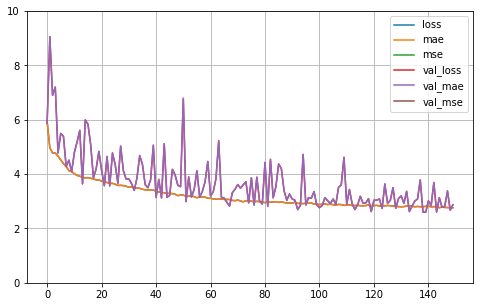

In [123]:
#Plotting graph for loss, mae, val_loss and val_mae
import matplotlib.pyplot as plt
pd.DataFrame(history_e.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.show()

No handles with labels found to put in legend.


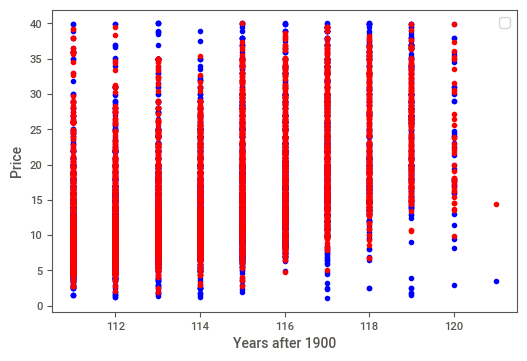

In [30]:
#plotting prediction and actual price
plt.scatter(x_test.year, y_test, color = "blue")
plt.scatter(x_test.year, y_pred2, color = "red")
plt.xlabel('Years after 1900')
plt.ylabel('Price')
plt.legend()
plt.show()

No handles with labels found to put in legend.


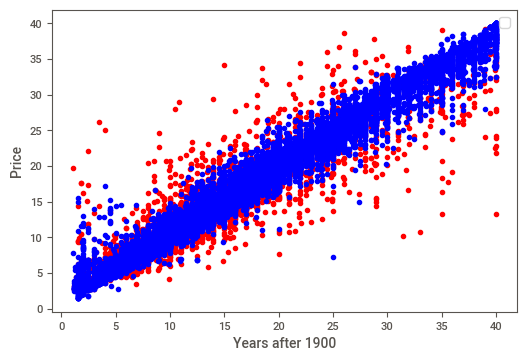

In [26]:
#plotting prediction and actual price
import matplotlib.pyplot as plt

plt.scatter(y_test, regressor.predict(x_test), color = "red")
plt.scatter(y_train, regressor.predict(x_train), color = "blue")
plt.xlabel('Years after 1900')
plt.ylabel('Price')
plt.legend()
plt.show()

No handles with labels found to put in legend.


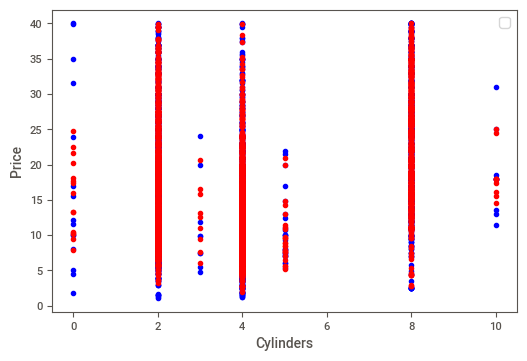

In [32]:
#plotting prediction and actual price
plt.scatter(x_test.cylinders, y_test, color = "blue")
plt.scatter(x_test.cylinders, y_pred2, color = "red")
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.legend()
plt.show()

No handles with labels found to put in legend.


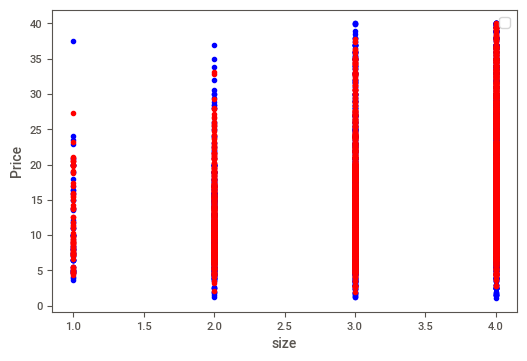

In [39]:
#plotting prediction and actual price
plt.scatter(x_test['size'], y_test, color = "blue")
plt.scatter(x_test['size'], y_pred2, color = "red")
plt.xlabel('size')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,size,type
5,13.995,112,13,3433,3,2,2,37,0,0,4,10
7,8.995,111,7,8023,3,2,2,35,0,0,4,0
8,10.995,114,13,3308,3,2,2,34,0,0,4,0
10,10.995,111,7,7028,3,8,2,42,0,0,4,10
11,12.450,111,7,7028,3,8,2,30,0,0,4,10
